Shape: (74682, 4)
      0            1         2  \
0  2401  Borderlands  Positive   
1  2401  Borderlands  Positive   
2  2401  Borderlands  Positive   
3  2401  Borderlands  Positive   
4  2401  Borderlands  Positive   

                                                   3  
0  im getting on borderlands and i will murder yo...  
1  I am coming to the borders and I will kill you...  
2  im getting on borderlands and i will kill you ...  
3  im coming on borderlands and i will murder you...  
4  im getting on borderlands 2 and i will murder ...  


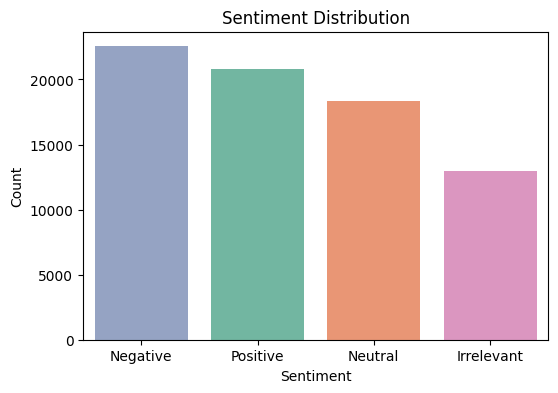

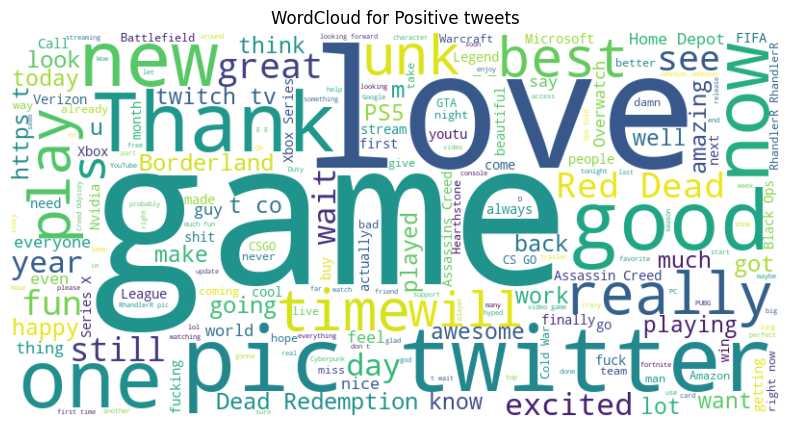

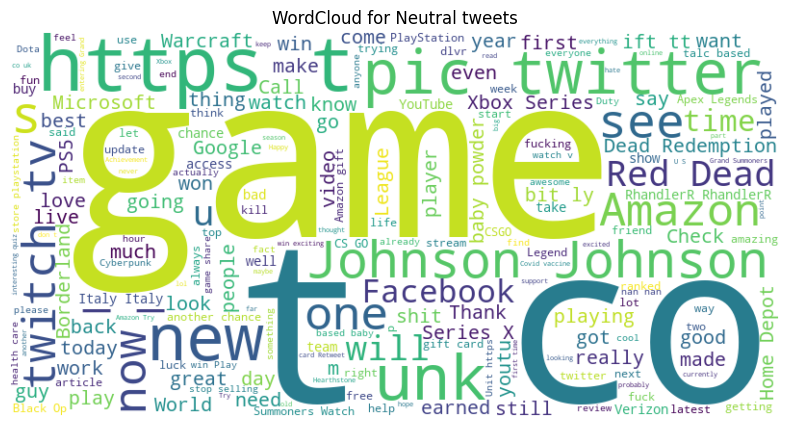

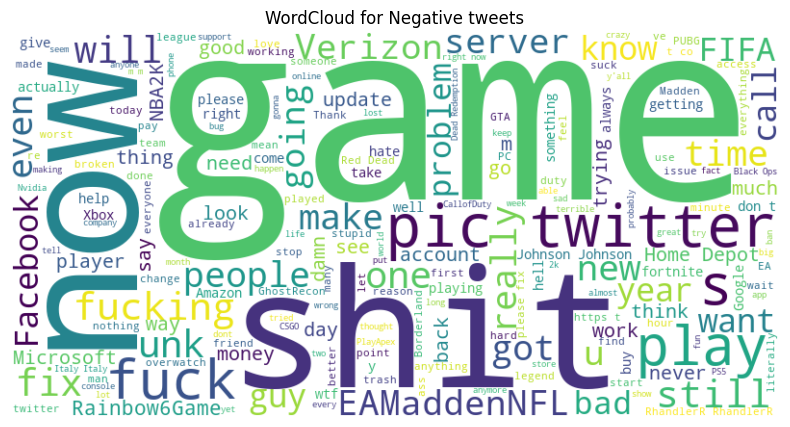

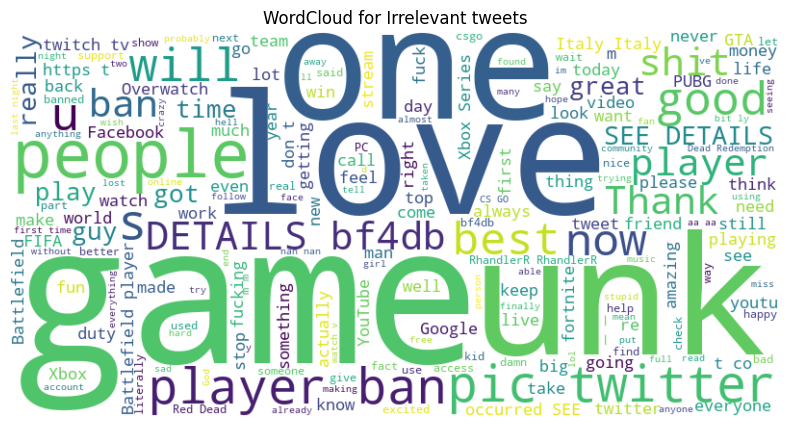

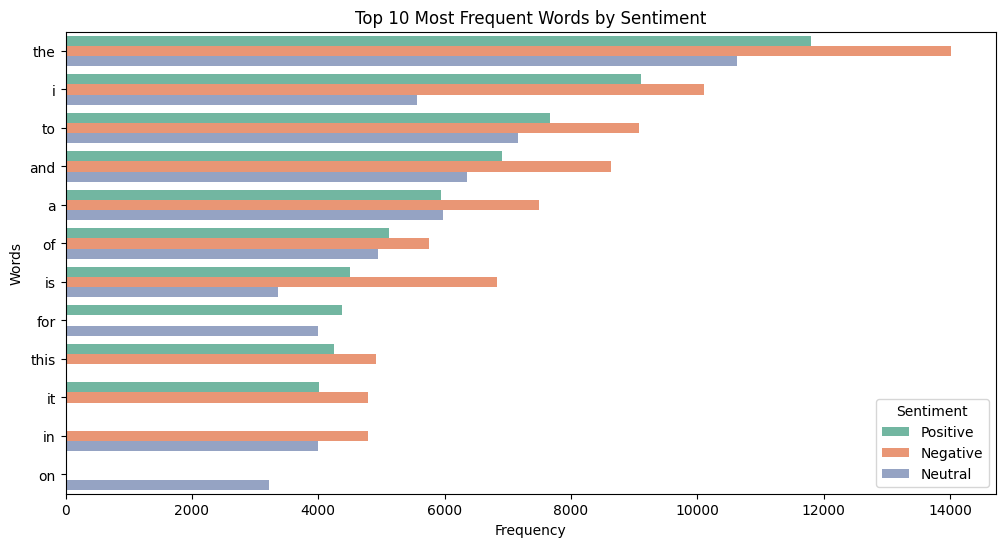

In [ ]:

# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
from collections import Counter
import re

# 1. Load dataset
df = pd.read_csv("twitter_training (1).csv", header=None)
print("Shape:", df.shape)
print(df.head())

# Add column names
df.columns = ["id", "entity", "sentiment", "tweet"]

# 2. Sentiment distribution (FIXED: add hue to avoid warning)
plt.figure(figsize=(6,4))
sns.countplot(
    x="sentiment",
    hue="sentiment",   # added
    data=df,
    order=df["sentiment"].value_counts().index,
    palette="Set2",
    legend=False       # avoids duplicate legend
)
plt.title("Sentiment Distribution")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.show()

# 3. WordClouds for each sentiment
stopwords = set(STOPWORDS)

for sentiment in df["sentiment"].unique():
    text = " ".join(df[df["sentiment"]==sentiment]["tweet"].astype(str))
    wordcloud = WordCloud(
        stopwords=stopwords,
        background_color="white",
        width=800,
        height=400
    ).generate(text)
    
    plt.figure(figsize=(10,5))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.title(f"WordCloud for {sentiment} tweets")
    plt.show()
    
# --- Cleaning function ---
def clean_text(text):
    text = re.sub(r"http\S+|www\S+|https\S+", "", text)  # remove links
    text = re.sub(r"[^A-Za-z\s]", "", text)  # remove special chars
    return text.lower()


df["clean_tweet"] = df["tweet"].astype(str).apply(clean_text)

# --- Get top words for each sentiment ---
def get_top_words(sentiment, n=10):
    words = " ".join(df[df["sentiment"]==sentiment]["clean_tweet"]).split()
    return Counter(words).most_common(n)

sentiments = ["Positive", "Negative", "Neutral"]
top_words_data = []

for s in sentiments:
    common = get_top_words(s, n=10)
    for word, count in common:
        top_words_data.append([s, word, count])

# Create DataFrame
top_words_df = pd.DataFrame(top_words_data, columns=["Sentiment", "Word", "Count"])

plt.figure(figsize=(12,6))
sns.barplot(
    data=top_words_df,
    x="Count",
    y="Word",
    hue="Sentiment",     
    palette="Set2"
)
plt.title("Top 10 Most Frequent Words by Sentiment")
plt.xlabel("Frequency")
plt.ylabel("Words")
plt.legend(title="Sentiment")
plt.show()

